In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import datetime as dt

In [ ]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/NFL Play by Play 2009-2017 (v4).csv")

In [ ]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
data.shape

(407688, 102)

In [ ]:
data.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object

In [ ]:
data.isnull().sum()

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

In [ ]:
data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [ ]:
data.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [ ]:
print(data.isnull().sum())

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64


In [ ]:
data.count()

Date        407688
GameID      407688
Drive       407688
qtr         407688
down        346534
             ...  
Win_Prob    382679
WPA         402147
airWPA      159187
yacWPA      158926
Season      407688
Length: 102, dtype: int64

In [ ]:
new_data = data.dropna(axis = 0, how ='any')
new_data

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [ ]:
data.columns


Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

In [ ]:
data.corr()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
GameID,1.000000,-0.016707,0.000594,-0.003281,-0.007028,-0.002367,-0.008588,0.015798,0.012117,0.003913,...,0.009372,0.016175,-0.016305,0.015885,-0.016027,-0.005436,0.000220,0.001547,0.003619,0.997954
Drive,-0.016707,1.000000,0.917050,-0.006638,-0.249329,-0.942744,-0.090384,0.009593,-0.030920,-0.022904,...,-0.028647,0.037824,-0.034839,0.037030,-0.034399,-0.040265,-0.014801,0.037867,-0.041260,-0.016706
qtr,0.000594,0.917050,1.000000,0.009883,-0.032128,-0.964949,-0.055985,0.001363,-0.048339,-0.013548,...,-0.026846,0.035767,-0.032358,0.035109,-0.032080,-0.032025,-0.007070,0.042343,-0.040791,0.000821
down,-0.003281,-0.006638,0.009883,1.000000,-0.021469,-0.015410,0.021489,0.003971,-0.049604,-0.245346,...,-0.108199,0.000630,-0.000630,0.000932,-0.000932,-0.033431,0.070835,0.099417,-0.079714,-0.003335
TimeUnder,-0.007028,-0.249329,-0.032128,-0.021469,1.000000,0.292694,0.100377,0.015908,0.132188,0.089984,...,0.019319,-0.012257,0.011933,-0.011756,0.011639,0.020808,0.025833,-0.031915,0.035432,-0.007016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Win_Prob,-0.005436,-0.040265,-0.032025,-0.033431,0.020808,0.036060,0.099937,-0.025259,-0.165015,-0.025620,...,0.030416,0.001262,-0.004023,0.001930,-0.004380,1.000000,-0.028346,-0.038524,0.025949,-0.005598
WPA,0.000220,-0.014801,-0.007070,0.070835,0.025833,0.013594,-0.006084,-0.027847,0.023448,-0.003184,...,0.567570,-0.002838,0.004634,-0.000819,0.000328,-0.028346,1.000000,0.187258,0.603656,0.000371
airWPA,0.001547,0.037867,0.042343,0.099417,-0.031915,-0.048967,-0.014904,-0.095303,-0.063400,-0.072802,...,-0.407682,-0.016498,0.016498,-0.013848,0.013848,-0.038524,0.187258,1.000000,-0.670102,0.001690
yacWPA,0.003619,-0.041260,-0.040791,-0.079714,0.035432,0.048516,0.009906,0.044320,0.066892,0.040947,...,0.765652,0.008596,-0.008596,0.008525,-0.008525,0.025949,0.603656,-0.670102,1.000000,0.003660


count    407512.000000
mean          0.094614
std           0.071990
min           0.000000
25%           0.034599
50%           0.083088
75%           0.149943
max           0.360177
Name: Opp_Field_Goal_Prob, dtype: float64


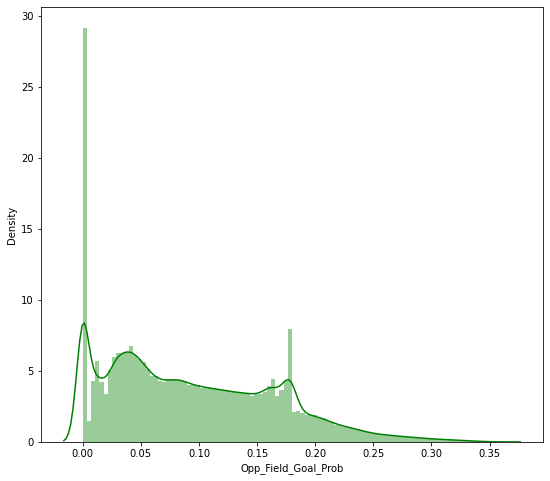

In [ ]:
print(data['Opp_Field_Goal_Prob'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['Opp_Field_Goal_Prob'], color='g', bins=100, hist_kws={'alpha': 0.4});

<function matplotlib.pyplot.show>

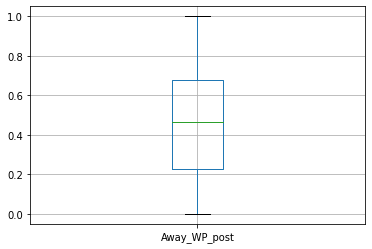

In [ ]:
data.boxplot(column=["Away_WP_post"])
plt.show

In [ ]:
print(data.isnull().sum())

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64


In [ ]:
data['Date'].sort_values(ascending=False)

407687    2017-12-31
405817    2017-12-31
405825    2017-12-31
405824    2017-12-31
405823    2017-12-31
             ...    
118       2009-09-10
117       2009-09-10
116       2009-09-10
115       2009-09-10
0         2009-09-10
Name: Date, Length: 407688, dtype: object

In [ ]:
data.Season.value_counts()

2015    46129
2016    45736
2014    45502
2012    45415
2013    45248
2017    45241
2011    45070
2010    44751
2009    44596
Name: Season, dtype: int64

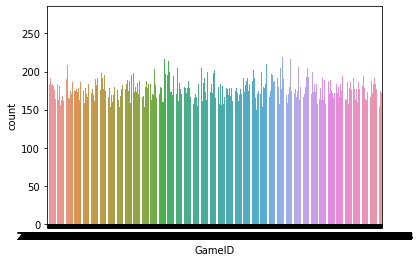

In [ ]:
sns.countplot(x='GameID',data=data)

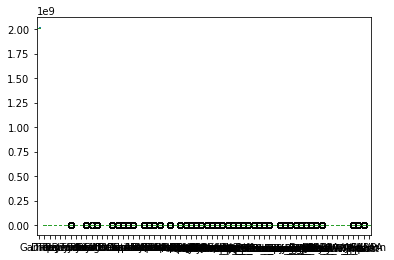

In [ ]:
data.plot.box()

In [ ]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows:", duplicate_rows_data.shape)

number of duplicate rows: (0, 102)


In [ ]:
data.count()

Date        407688
GameID      407688
Drive       407688
qtr         407688
down        346534
             ...  
Win_Prob    382679
WPA         402147
airWPA      159187
yacWPA      158926
Season      407688
Length: 102, dtype: int64

In [ ]:
data=data.dropna()


In [ ]:
print(data.isnull().sum())

Date        0.0
GameID      0.0
Drive       0.0
qtr         0.0
down        0.0
           ... 
Win_Prob    0.0
WPA         0.0
airWPA      0.0
yacWPA      0.0
Season      0.0
Length: 102, dtype: float64


Exploratory Data Analysis Achieved